<a href="https://colab.research.google.com/github/Paritosh0007/Carona-Virus-Data-Analysis/blob/master/Carona_Virus_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
corona = pd.read_csv("/content/drive/My Drive/Caronaviros /covid_19_data.csv",parse_dates=["ObservationDate"])

In [0]:
corona.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
corona = corona.drop(['SNo'],axis=1)

In [0]:
corona.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2105,2020-02-22,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
2106,2020-02-22,"Sacramento County, CA",US,2020-02-21T23:13:16,1.0,0.0,0.0
2107,2020-02-22,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
2108,2020-02-22,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0
2109,2020-02-22,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0


In [0]:
corona.describe(include='all')

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,2110,1534,2110,2110,2110.000000,2110.000000,2110.000000
unique,32,71,37,609,NaN,NaN,NaN
top,2020-02-21 00:00:00,Taiwan,Mainland China,1/31/2020 23:59,NaN,NaN,NaN
freq,84,32,986,62,NaN,NaN,NaN
first,2020-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,538.973460,13.546919,78.179147
std,NaN,NaN,NaN,NaN,4443.023939,139.516579,656.982337
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000


In [0]:
corona.rename({'Province/State':'Province','Country/Region':'Country'},axis=1,inplace=True)

In [0]:
corona.head()

,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
corona = corona.drop(['Last Update'],axis=1)

In [0]:
corona['Province'].value_counts().sort_values()

Chicago                                  1
Lackland, TX                             1
Travis, CA (From Diamond Princess)       1
None                                     1
Lackland, TX (From Diamond Princess)     1
                                        ..
Shandong                                32
Anhui                                   32
Guizhou                                 32
Gansu                                   32
Taiwan                                  32
Name: Province, Length: 71, dtype: int64

In [0]:
corona['Country'].value_counts().sort_values()

Colombia                  1
Ivory Coast               1
Brazil                    1
Mexico                    1
Israel                    2
Lebanon                   2
Iran                      4
Egypt                     9
Others                   16
Belgium                  19
Spain                    22
Sweden                   23
Italy                    23
Russia                   23
UK                       23
India                    24
Philippines              25
United Arab Emirates     25
Finland                  25
Germany                  26
Cambodia                 27
Sri Lanka                27
Nepal                    29
France                   30
Malaysia                 30
Vietnam                  31
Singapore                31
Macau                    32
South Korea              32
Hong Kong                32
Taiwan                   32
Japan                    32
Thailand                 32
Canada                   73
Australia               105
US                  

In [0]:
corona['ObservationDate'].value_counts().sort_values()

2020-01-22    38
2020-01-24    41
2020-01-25    44
2020-01-23    46
2020-01-26    47
2020-01-27    51
2020-01-28    52
2020-01-29    54
2020-01-30    58
2020-01-31    62
2020-02-02    67
2020-02-01    67
2020-02-03    68
2020-02-04    70
2020-02-06    71
2020-02-05    71
2020-02-10    72
2020-02-08    72
2020-02-09    72
2020-02-07    72
2020-02-12    73
2020-02-11    73
2020-02-13    74
2020-02-18    75
2020-02-16    75
2020-02-15    75
2020-02-14    75
2020-02-17    75
2020-02-19    76
2020-02-20    76
2020-02-22    84
2020-02-21    84
Name: ObservationDate, dtype: int64

In [0]:
dates = list(corona['ObservationDate'].dt.day)

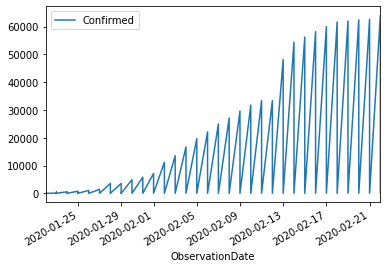

In [0]:
corona.plot(x='ObservationDate',y='Confirmed')

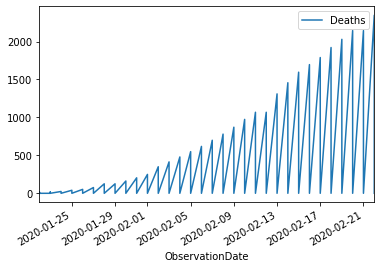

In [0]:
ax = corona.plot(x='ObservationDate',y='Deaths')

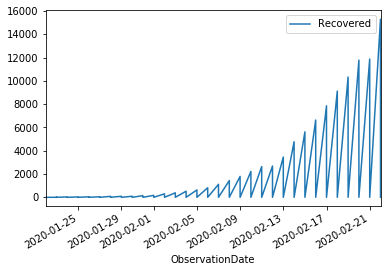

In [0]:
corona.plot(x='ObservationDate',y='Recovered')

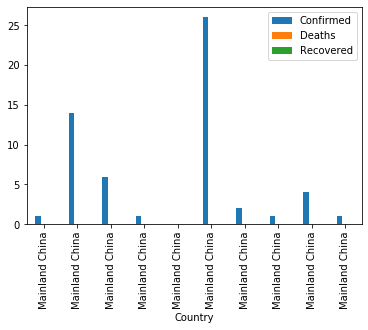

In [0]:
corona[:10].plot.bar(x='Country',y=['Confirmed','Deaths','Recovered'])

In [0]:
all_country_recovery = {}
all_country_death = {}
for country in corona['Country']:
    if country not in all_country_recovery and country != 'Mainland China':
        all_country_recovery[country] = corona.loc[corona['Country']==country,'Recovered'].sum()
        all_country_death[country] = corona.loc[corona['Country']==country,'Deaths'].sum()

In [0]:
all_country_recovery.values()

dict_values([32.0, 55.0, 26.0, 46.0, 184.0, 253.0, 132.0, 293.0, 11.0, 110.0, 106.0, 122.0, 0.0, 0.0, 0.0, 38.0, 11.0, 15.0, 11.0, 15.0, 0.0, 69.0, 11.0, 34.0, 21.0, 1.0, 60.0, 22.0, 0.0, 16.0, 6.0, 4.0, 0.0, 0.0, 0.0, 0.0])

In [0]:
all_country_death.values()

dict_values([23.0, 0.0, 7.0, 0.0, 10.0, 0.0, 5.0, 0.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 13.0, 0.0, 0.0])

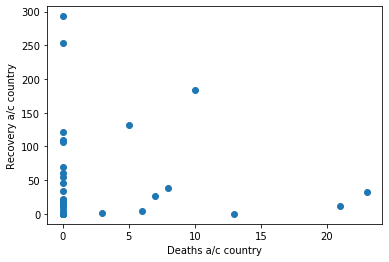

In [0]:
plt.scatter(all_country_death.values(),all_country_recovery.values())
plt.xlabel('Deaths a/c country')
plt.ylabel('Recovery a/c country')
plt.show()

In [0]:
all_province_recovery = {}
all_province_death = {}
for province in corona['Province']:
    if province not in all_province_recovery and province != 'Hubei':
        all_province_recovery[province] = corona.loc[corona['Province']==province,'Recovered'].sum()
        all_province_death[province] = corona.loc[corona['Province']==province,'Deaths'].sum()

In [0]:
all_province_recovery

{'Anhui': 4098.0,
 'Arizona': 0.0,
 'Ashland, NE': 0.0,
 'Bavaria': 0.0,
 'Beijing': 1620.0,
 'Boston, MA': 0.0,
 'British Columbia': 0.0,
 'California': 0.0,
 'Chicago': 0.0,
 'Chicago, IL': 28.0,
 'Chongqing': 2805.0,
 'Cruise Ship': 0.0,
 'Diamond Princess cruise ship': 4.0,
 'From Diamond Princess': 0.0,
 'Fujian': 1250.0,
 'Gansu': 720.0,
 'Guangdong': 6541.0,
 'Guangxi': 858.0,
 'Guizhou': 666.0,
 'Hainan': 809.0,
 'Hebei': 1585.0,
 'Heilongjiang': 1211.0,
 'Henan': 6466.0,
 'Hong Kong': 32.0,
 'Humboldt County, CA': 0.0,
 'Hunan': 6594.0,
 'Illinois': 0.0,
 'Inner Mongolia': 155.0,
 'Jiangsu': 3251.0,
 'Jiangxi': 3932.0,
 'Jilin': 437.0,
 'Lackland, TX': 0.0,
 'Lackland, TX (From Diamond Princess)': 0.0,
 'Liaoning': 555.0,
 'London, ON': 11.0,
 'Los Angeles, CA': 0.0,
 'Macau': 55.0,
 'Madison, WI': 0.0,
 'New South Wales': 68.0,
 'Ningxia': 469.0,
 'None': 0.0,
 'Omaha, NE (From Diamond Princess)': 0.0,
 'Ontario': 0.0,
 'Orange, CA': 0.0,
 'Qinghai': 176.0,
 'Queensland': 2.0

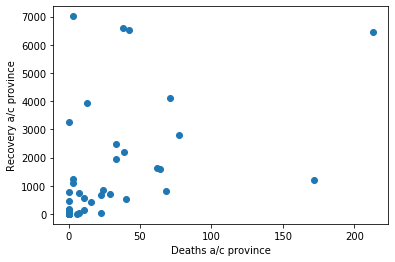

In [0]:
plt.scatter(all_province_death.values(),all_province_recovery.values())
plt.xlabel('Deaths a/c province')
plt.ylabel('Recovery a/c province')
plt.show()